We have 


# Potential new features:
- additional forecast demand
- additional total demand
- additional temperature??
- 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
# general settings
class CFG:
    data_path = './../data'
    img_dim1 = 20
    img_dim2 = 10

In [3]:
plt.style.use('fivethirtyeight')  
plt.rcParams.update({'figure.figsize': (CFG.img_dim1, CFG.img_dim2)})  

In [4]:
nsw_df = pd.read_parquet(os.path.join(CFG.data_path, 'NSW',  'nsw_df.parquet'))

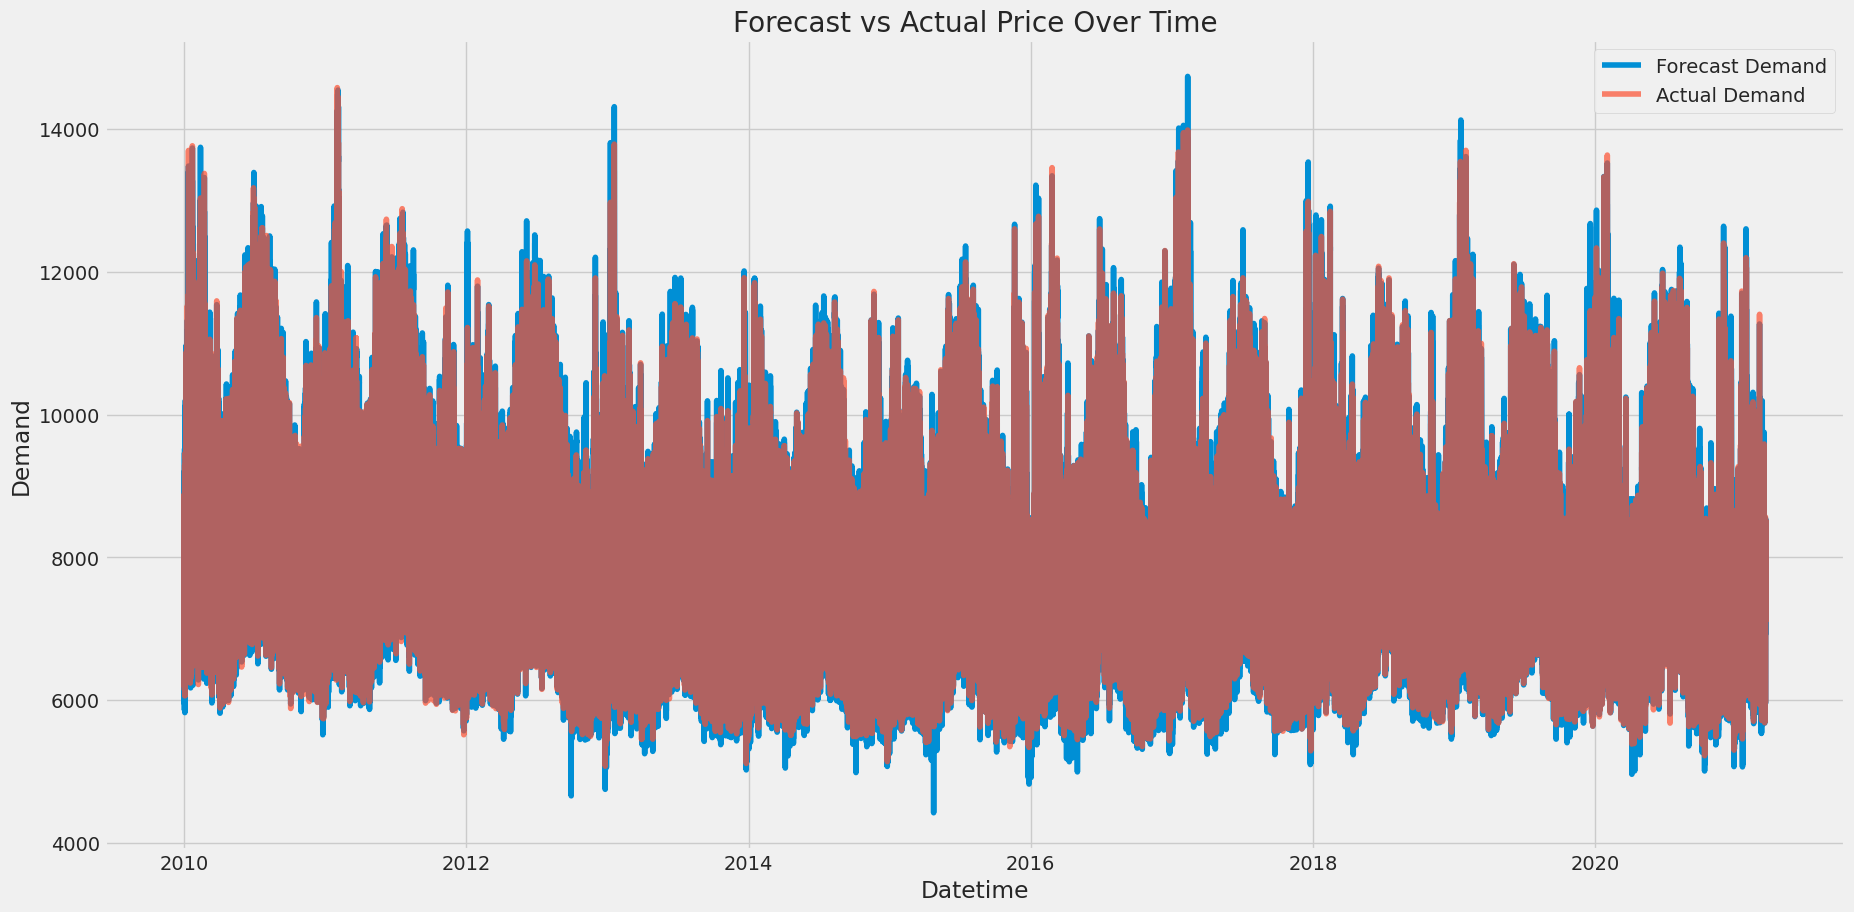

In [5]:
plt.figure(figsize=(CFG.img_dim1, CFG.img_dim2))
plt.plot(nsw_df['DATETIME'], nsw_df['FORECASTDEMAND'], label='Forecast Demand')
plt.plot(nsw_df['DATETIME'], nsw_df['TOTALDEMAND'], label='Actual Demand', alpha=0.7)
plt.xlabel('Datetime')
plt.ylabel('Demand')
plt.title('Forecast vs Actual Price Over Time')
plt.legend()
plt.show()

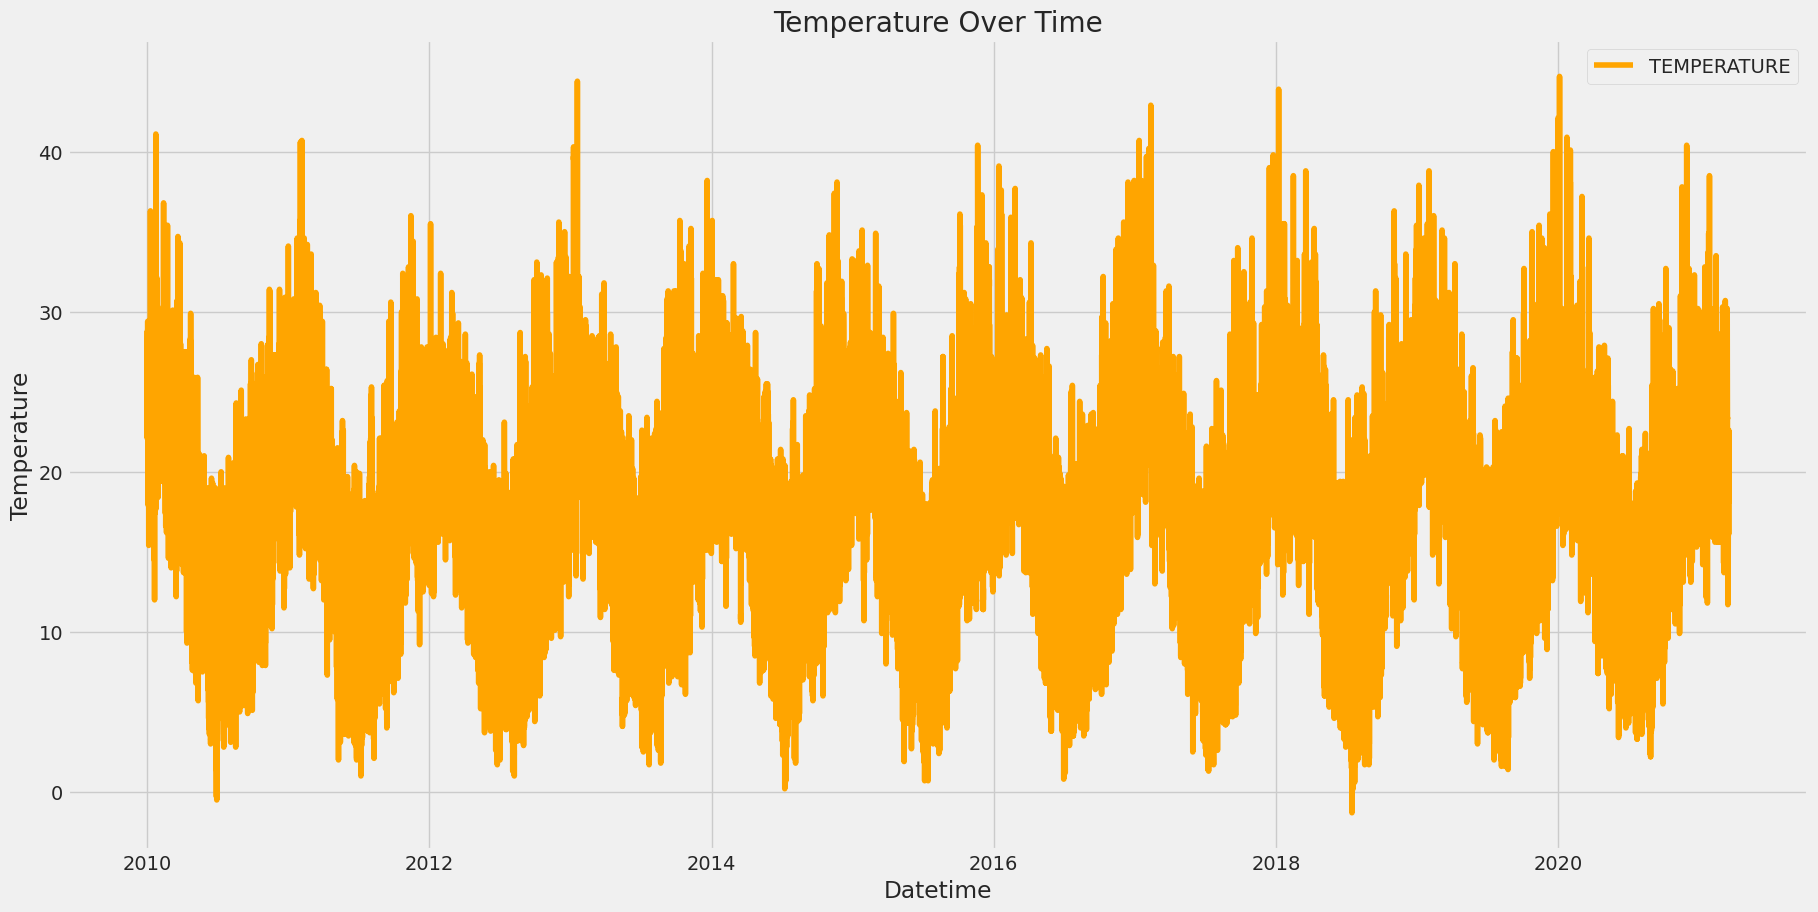

In [6]:
plt.figure(figsize=(CFG.img_dim1, CFG.img_dim2))
plt.plot(nsw_df['DATETIME'], nsw_df['TEMPERATURE'], color='orange', label='TEMPERATURE')
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')
plt.legend()
plt.show()

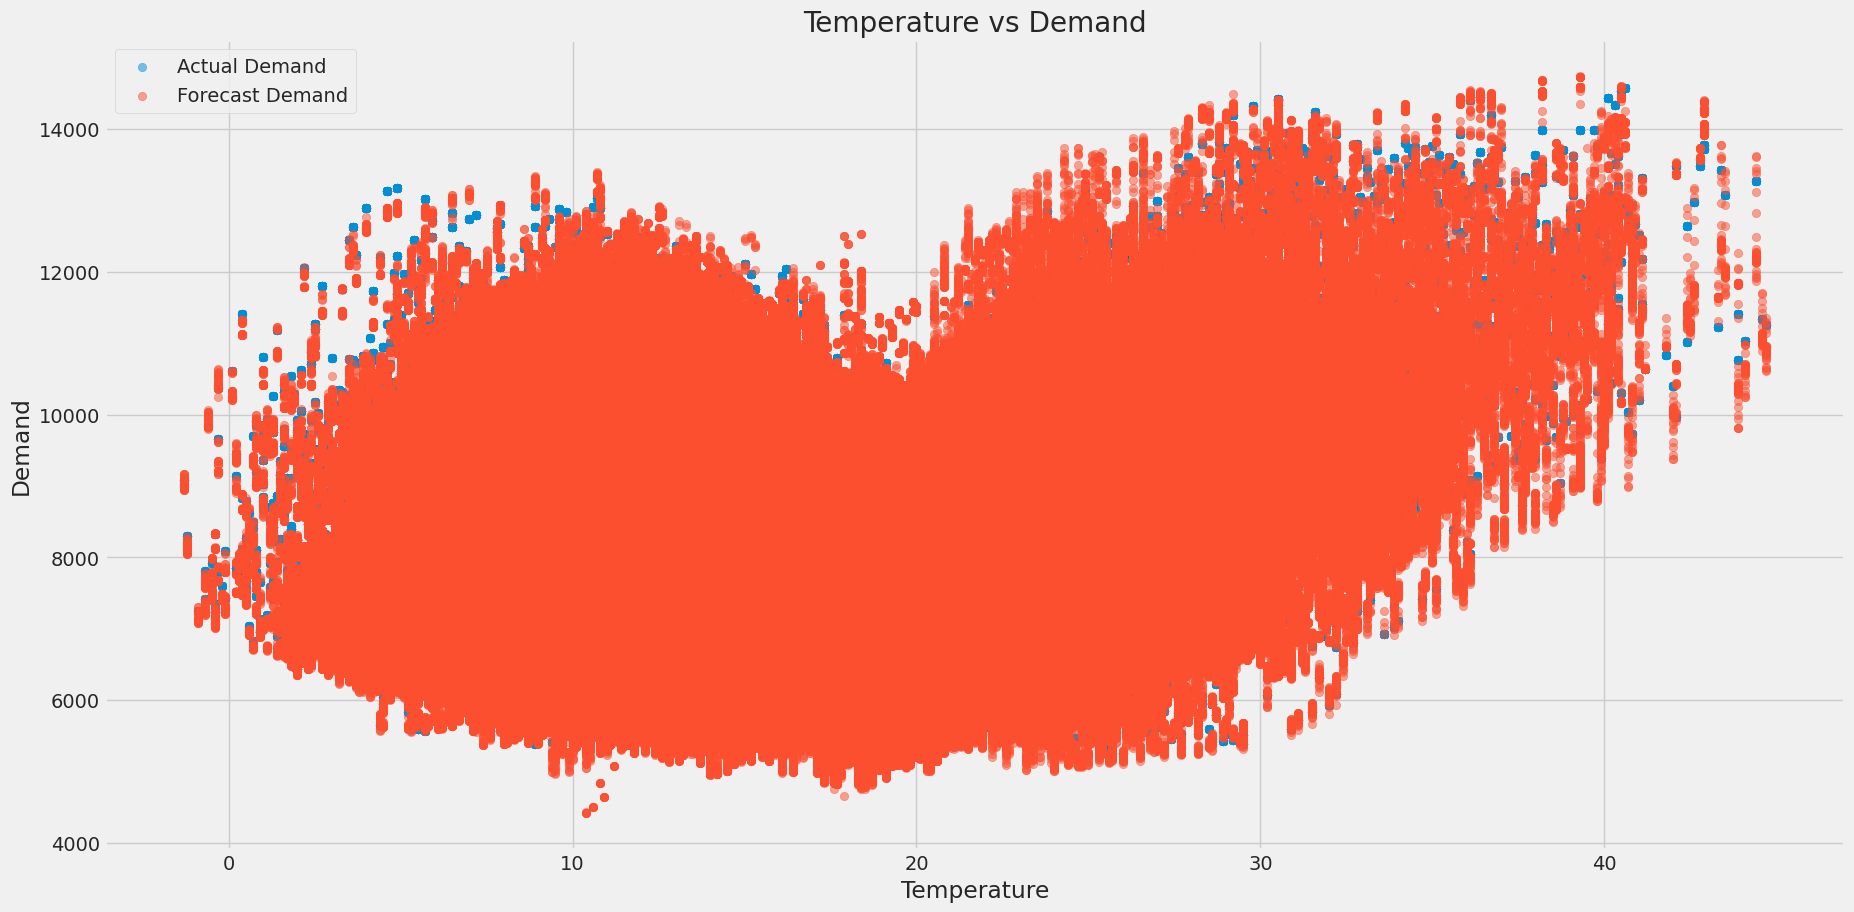

In [7]:
plt.figure(figsize=(CFG.img_dim1, CFG.img_dim2))
plt.scatter(nsw_df['TEMPERATURE'], nsw_df['TOTALDEMAND'], label='Actual Demand', alpha=0.5)
plt.scatter(nsw_df['TEMPERATURE'], nsw_df['FORECASTDEMAND'], label='Forecast Demand', alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Demand')
plt.title('Temperature vs Demand')
plt.legend()
plt.show()

<Figure size 2000x1000 with 0 Axes>

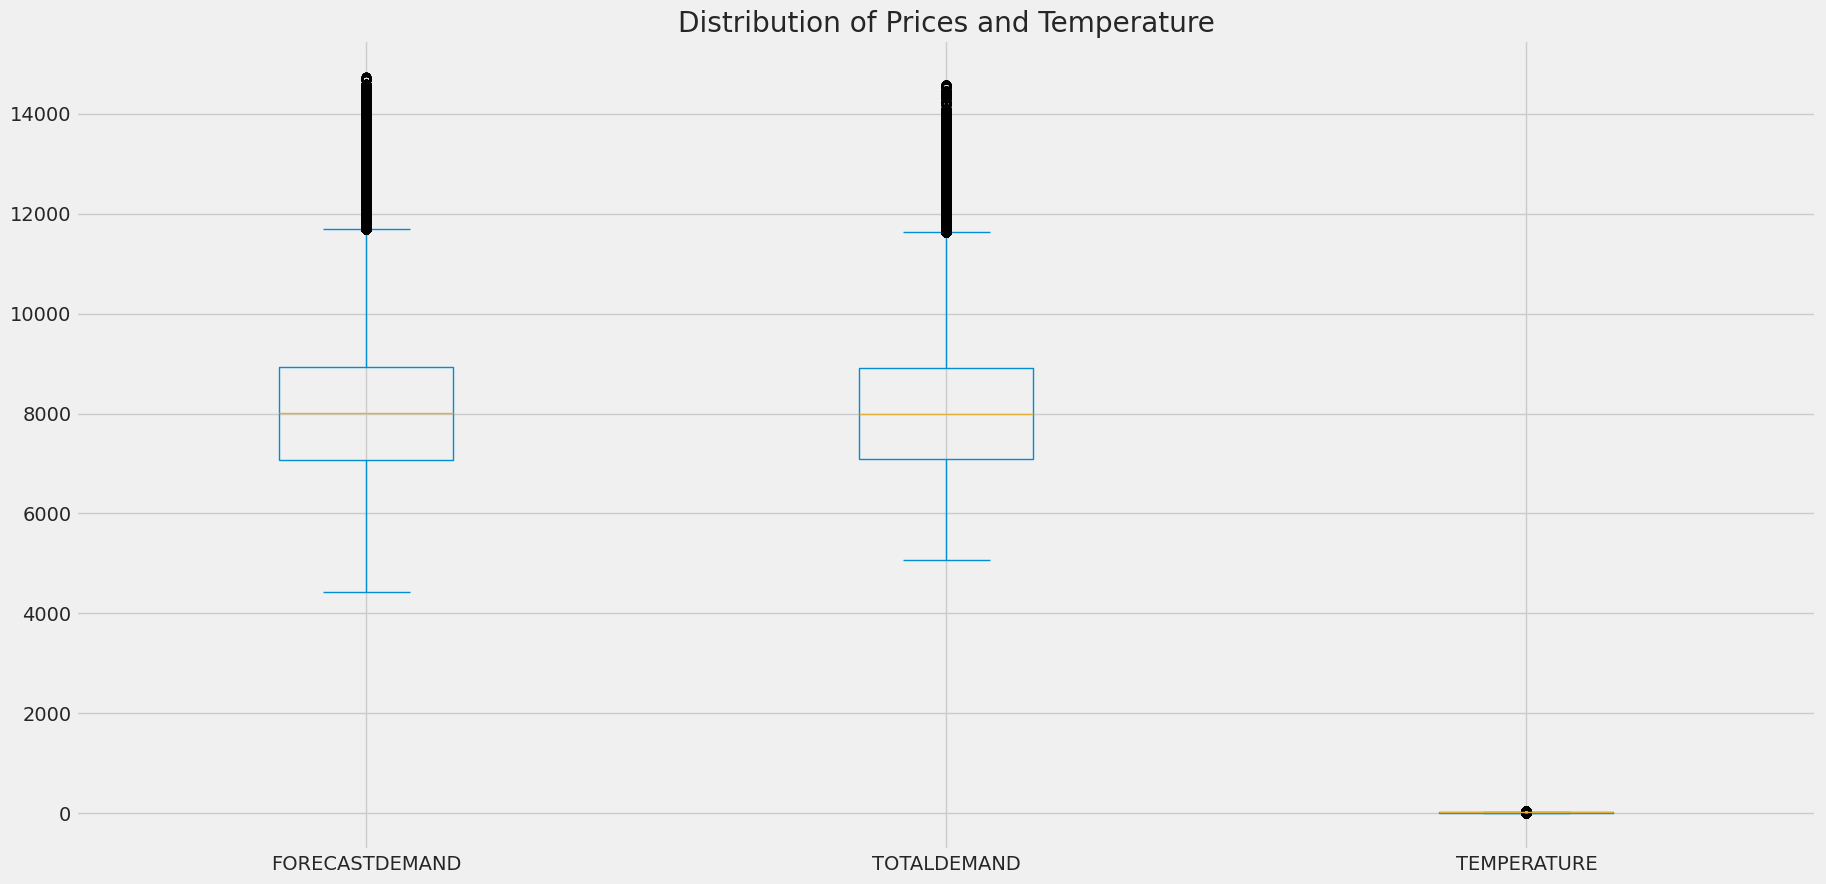

In [8]:
plt.figure(figsize=(CFG.img_dim1, CFG.img_dim2))
nsw_df[['FORECASTDEMAND', 'TOTALDEMAND', 'TEMPERATURE']].plot(kind='box')
plt.title('Distribution of Prices and Temperature')
plt.show()

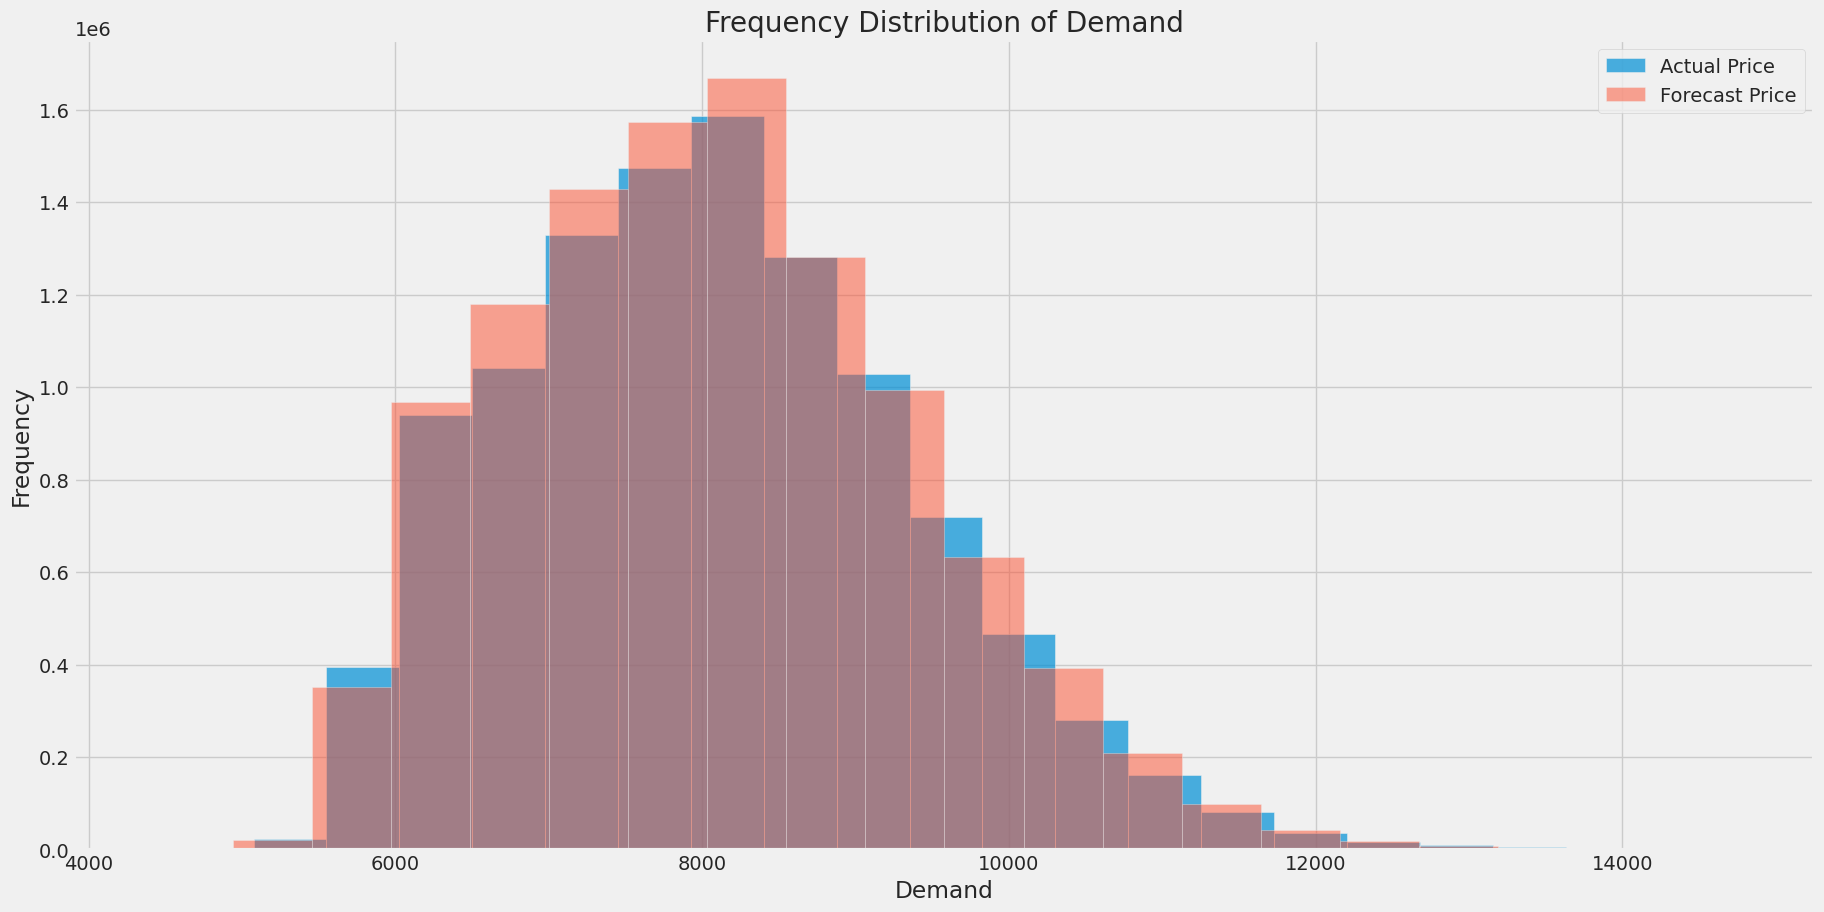

In [9]:
plt.figure(figsize=(CFG.img_dim1, CFG.img_dim2))
nsw_df['TOTALDEMAND'].hist(alpha=0.7, label='Actual Price', bins=20)
nsw_df['FORECASTDEMAND'].hist(alpha=0.5, label='Forecast Price', bins=20)
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Demand')
plt.legend()
plt.show()

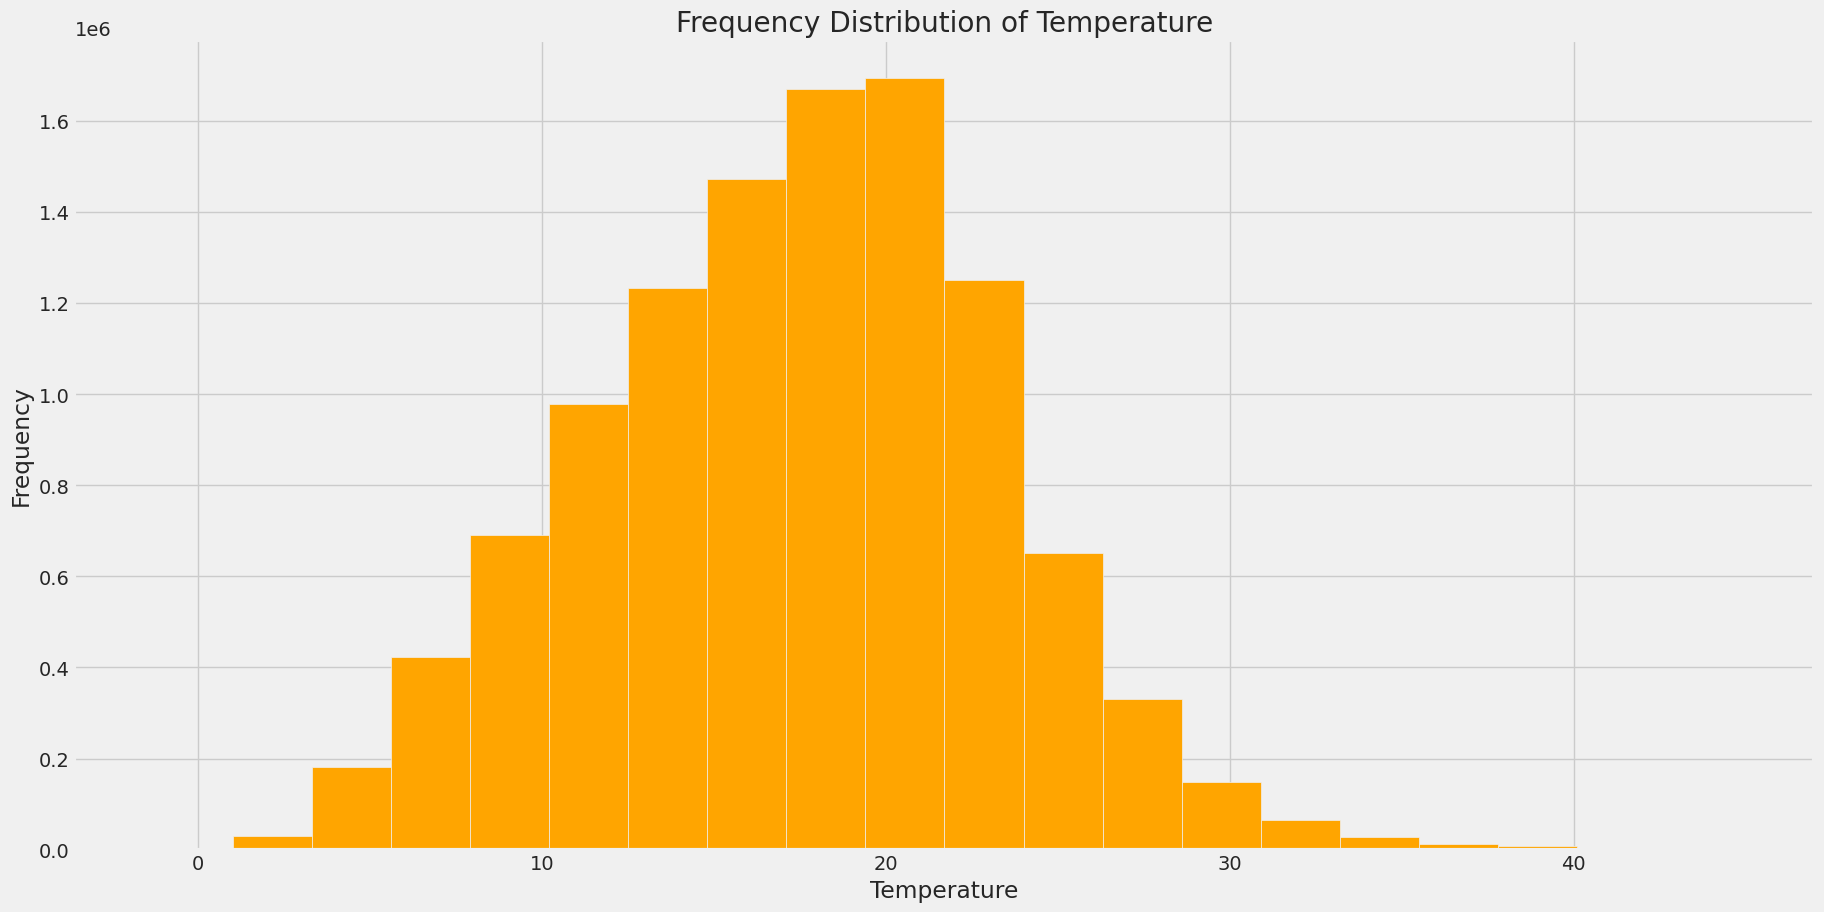

In [10]:
plt.figure(figsize=(CFG.img_dim1, CFG.img_dim2))
nsw_df['TEMPERATURE'].hist(color='orange', bins=20)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Temperature')
plt.show()

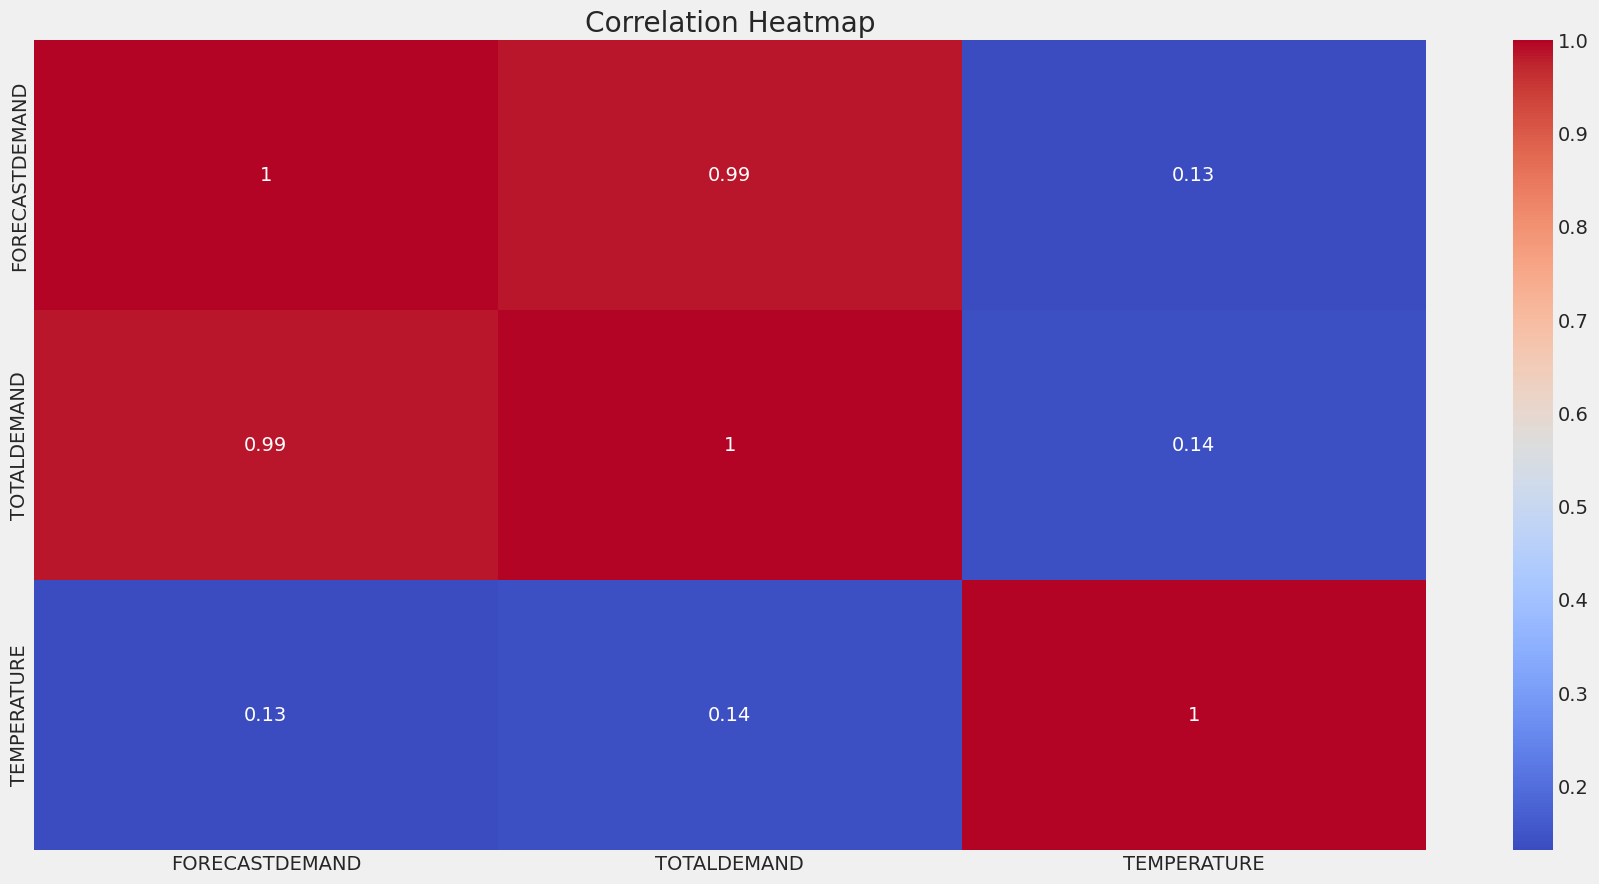

In [11]:
plt.figure(figsize=(CFG.img_dim1, CFG.img_dim2))
sns.heatmap(nsw_df[['FORECASTDEMAND', 'TOTALDEMAND', 'TEMPERATURE']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()